<a href="https://colab.research.google.com/github/soham-wairkar/CE888/blob/main/LAB7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [22]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### Training the convnet on MNIST images

In [25]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [27]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 44s 58ms/step - loss: 0.4591 - accuracy: 0.8501 - val_loss: 0.0671 - val_accuracy: 0.9797
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.0456 - val_accuracy: 0.9870
Epoch 3/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 4/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0414 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0426 - val_accuracy: 0.9887


#### evaluate model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0303 - accuracy: 0.9911


0.991100013256073

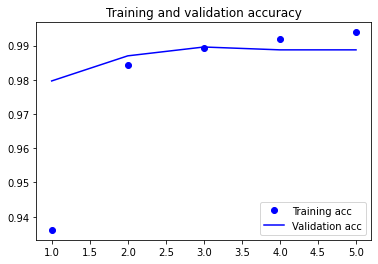

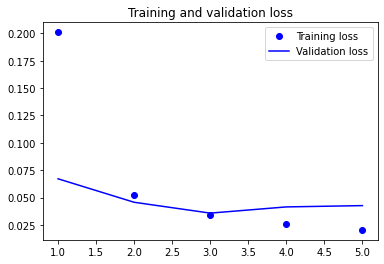

In [29]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [30]:
# Write code here
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='rmsprop', activation='relu'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [31]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)

optimizer = ['SGD', 'RMSprop','Adam']
activation = ['relu', 'tanh']
param_grid = dict(optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(train_images, train_labels)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 90.2min finished


Epoch 1/10
938/938 [==============================] - 51s 54ms/step - loss: 0.3973 - accuracy: 0.8731
Epoch 2/10
938/938 [==============================] - 50s 54ms/step - loss: 0.0495 - accuracy: 0.9847
Epoch 3/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0255 - accuracy: 0.9923
Epoch 5/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 7/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 8/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0100 - accuracy: 0.9965
Epoch 9/10
938/938 [==============================] - 50s 54ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 10/10
938/938 [==============================] - 50s 54ms/step - loss: 0.007

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.988317 using {'activation': 'relu', 'optimizer': 'RMSprop'}


In [33]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.975567 (0.000968) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.988317 (0.000290) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.987067 (0.001450) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.971500 (0.000748) with: {'activation': 'tanh', 'optimizer': 'SGD'}
0.987667 (0.000978) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.986567 (0.001414) with: {'activation': 'tanh', 'optimizer': 'Adam'}


In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [35]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 45s 59ms/step - loss: 0.4619 - accuracy: 0.8510 - val_loss: 0.0738 - val_accuracy: 0.9778
Epoch 2/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0534 - val_accuracy: 0.9834
Epoch 3/10
750/750 [==============================] - 45s 61ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0445 - val_accuracy: 0.9871
Epoch 4/10
750/750 [==============================] - 43s 58ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0551 - val_accuracy: 0.9856
Epoch 5/10
750/750 [==============================] - 43s 58ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0456 - val_accuracy: 0.9881
Epoch 6/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 7/10
750/750 [==============================] - 45s 61ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0437 - val_accuracy:

In [36]:
import pandas as pd

history_df = pd.DataFrame(model.history.history)

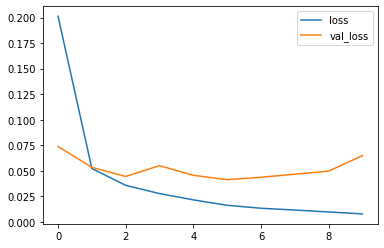

In [37]:
history_df[['loss','val_loss']].plot()

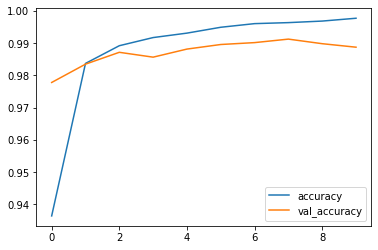

In [38]:

history_df[['accuracy','val_accuracy']].plot()